In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


In [25]:
df=pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [27]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [28]:
#Splitting the Order Date into Date and Time
df[['Date', 'Time']] = df['FullDate'].str.split(' ', n=1, expand=True)

In [29]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice,Date,Time
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710,2010-09-01,00:00:00
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635,2010-09-01,01:00:00
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565,2010-09-01,02:00:00
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910,2010-09-01,03:00:00
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030,2010-09-01,04:00:00
...,...,...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925,2021-02-28,19:00:00
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880,2021-02-28,20:00:00
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060,2021-02-28,21:00:00
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000,2021-02-28,22:00:00


In [30]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice,Date,Time
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710,2010-09-01,00:00:00
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635,2010-09-01,01:00:00
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565,2010-09-01,02:00:00
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910,2010-09-01,03:00:00
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030,2010-09-01,04:00:00
...,...,...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925,2021-02-28,19:00:00
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880,2021-02-28,20:00:00
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060,2021-02-28,21:00:00
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000,2021-02-28,22:00:00


In [31]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
Date         0
Time         0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
 5   Date       92016 non-null  object 
 6   Time       92016 non-null  object 
dtypes: float64(4), object(3)
memory usage: 4.9+ MB


In [33]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [34]:
df.shape

(92016, 7)

In [35]:
#df_daily = df.resample('D').sum()
#print(df_daily.head())

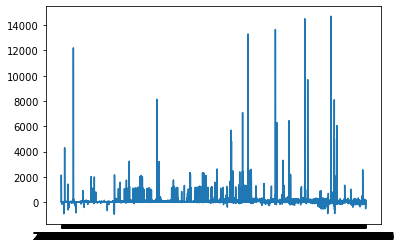

In [38]:
plt.plot(df.Date,df.ElecPrice)

In [39]:
df.corr()

,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,-0.009796,0.030173,0.002126
SysLoad,-0.009796,1.000000,-0.214574,0.138690
GasPrice,0.030173,-0.214574,1.000000,0.157768
ElecPrice,0.002126,0.138690,0.157768,1.000000


In [40]:
import scipy
import scipy.stats
from scipy.stats import pearsonr

In [42]:
corr2,_ = pearsonr(df.SysLoad, df.GasPrice)
corr2

-0.21457364524278147

In [53]:
train_data = df.iloc[:80000,:] 

In [54]:
test_data = df.iloc[80000:,:] 

In [55]:
train_data.shape

(80000, 7)

In [56]:
test_data.shape

(12016, 7)

In [60]:
train_data.reset_index(inplace = True)
train_data.head()

,index,FullDate,Tmax,SysLoad,GasPrice,ElecPrice,Date,Time
0,0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710,2010-09-01,00:00:00
1,1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635,2010-09-01,01:00:00
2,2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565,2010-09-01,02:00:00
3,3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910,2010-09-01,03:00:00
4,4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030,2010-09-01,04:00:00


In [61]:
df_train = train_data.iloc[:,:2]
df_train = df_train.rename(columns={"Date": "ds", "ElecPrice": "y"})
df_train.head()

,index,FullDate
0,0,2010-09-01 00:00:00
1,1,2010-09-01 01:00:00
2,2,2010-09-01 02:00:00
3,3,2010-09-01 03:00:00
4,4,2010-09-01 04:00:00


In [62]:
test_data.reset_index(inplace = True)
test_data.head()


,index,FullDate,Tmax,SysLoad,GasPrice,ElecPrice,Date,Time
0,80000,2019-10-17 08:00:00,17.3,27.72535,10.1911,96.435,2019-10-17,08:00:00
1,80001,2019-10-17 09:00:00,17.3,-222.64680,10.1911,17.850,2019-10-17,09:00:00
2,80002,2019-10-17 10:00:00,17.3,-626.62055,10.1911,0.975,2019-10-17,10:00:00
3,80003,2019-10-17 11:00:00,17.3,-845.19920,10.1911,-24.445,2019-10-17,11:00:00
4,80004,2019-10-17 12:00:00,17.3,-891.51860,10.1911,-31.365,2019-10-17,12:00:00


In [63]:
df_tests = test_data.iloc[:,:2]

In [64]:
df_tests = df_tests.rename(columns={"datetime": "ds", "Global_active_power": "y"})
df_tests.head()

,index,FullDate
0,80000,2019-10-17 08:00:00
1,80001,2019-10-17 09:00:00
2,80002,2019-10-17 10:00:00
3,80003,2019-10-17 11:00:00
4,80004,2019-10-17 12:00:00
